# 1) Delivery_time -> Predict delivery time using sorting time


## by using simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("delivery.csv")

In [3]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
X = data['Sorting Time']
Y = data['Delivery Time']

In [5]:
data.shape

(21, 2)

In [6]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


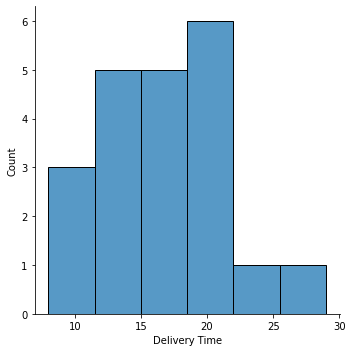

In [9]:
import seaborn as sns
sns.displot(data["Delivery Time"])

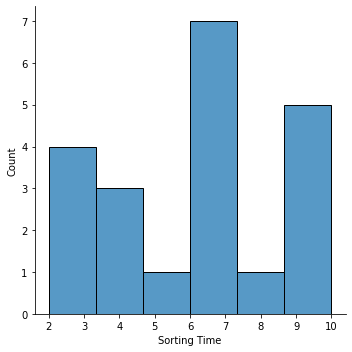

In [10]:
import seaborn as sns
sns.displot(data["Sorting Time"])

In [11]:
import statsmodels.formula.api as smf
model=smf.ols("np.log(Y) ~ np.log(X)",data=data).fit()

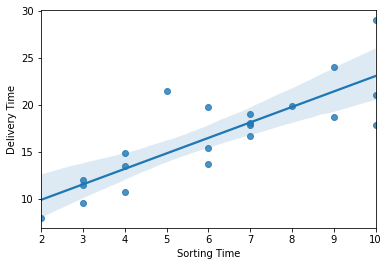

In [12]:
sns.regplot(x=X,y=Y,data=data);

In [13]:
model.params

Intercept    1.741987
np.log(X)    0.597522
dtype: float64

In [14]:
print(model.tvalues,'/n',model.pvalues)

Intercept    13.085552
np.log(X)     8.024484
dtype: float64 /n Intercept    5.921137e-11
np.log(X)    1.601539e-07
dtype: float64


In [15]:
(model.rsquared,model.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [16]:
newdata=pd.Series([10,12])

In [17]:
data_pred=pd.DataFrame(newdata,columns=['X'])

In [18]:
model.predict(data_pred)

0    3.117833
1    3.226774
dtype: float64

# or it may be solve by another method

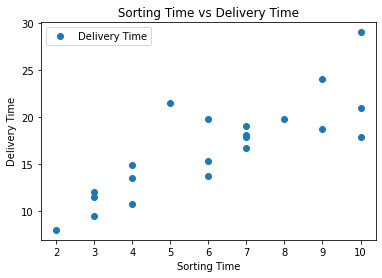

In [19]:
data.plot(x='Sorting Time', y='Delivery Time', style='o')
plt.title(' Sorting Time vs Delivery Time ')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [20]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [23]:
print(regressor.intercept_)

-0.8511588772839991


In [24]:
print(regressor.coef_)

[0.42391171]


In [25]:
y_pred = regressor.predict(X_test)

In [26]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,10,6.736861
1,3,4.023826
2,5,8.262943
3,4,4.871649
4,4,3.705892


In [27]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.743133016118426
Mean Squared Error: 4.637873006804294
Root Mean Squared Error: 2.1535721503595586
